# Descriptive analysis of hrctv_volume values categorised by tumour stage

In this notebook, we're analysing values of hrctv_volume of the research group. First, we will generate descriptive statistics of hrctv_volume values and visualise it. Then, we will categorise the hrctv_volume data by tumour stages 2B and 3B's and create subgroups. We will analyse and compare the subgroups by their descriptive statistics.

In [1]:
#Importing packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('whitegrid')
import statsmodels.api as sm
%matplotlib inline
pd.set_option('display.max_rows', None)
import scipy.stats as stats
from scipy.stats import shapiro
import statsmodels.stats.api as sms

In [2]:
# Importing data
df = pd.read_csv(r"C:\Users\gdbt0\OneDrive\Documents\GitHub\Projects\cancer\data\processed\research_group.csv")

In [3]:
# Selecting variables hrctv_volume and patient id
hrctv_volume = df[['id','hrctv_volume']]

In [4]:
# Selecting hrctv_volume values of patients having 2B stage tumour
hrctv_2B_volume = df.loc[df['T'] == '2B'][['id','hrctv_volume']]

In [5]:
# Selecting hrctv_volume values of patients having 3B stage tumour
hrctv_3B_volume = df.loc[df['T'] == '3B'][['id','hrctv_volume']]

## Descriptive statistics of hrctv_volume
The values of hrctv_volume has the following statistics.

In [6]:
print("Descriptive statistics")
hrctv_volume.describe()

Descriptive statistics


,id,hrctv_volume
count,44.000000,44.000000
mean,147.045455,28.765909
std,21.743702,9.447848
min,104.000000,10.500000
25%,131.750000,23.725000
50%,147.500000,27.100000
75%,164.500000,33.925000
max,184.000000,65.900000


<AxesSubplot:xlabel='hrctv_volume', ylabel='Count'>

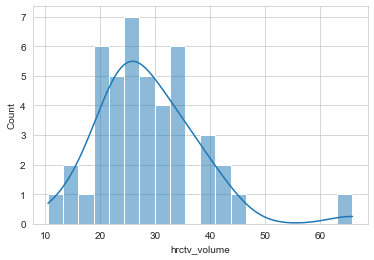

In [7]:
sns.histplot(hrctv_volume['hrctv_volume'],bins=20,kde=True)

In [8]:
print("95% confidence interval for the population mean value")
data = hrctv_volume['hrctv_volume']
stats.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=stats.sem(data))

95% confidence interval for the population mean value


(25.89350073106133, 31.63831745075685)

## Descriptive statistics of hrctv_volume of patients with 2B tumour stage

In [9]:
print("Descriptive statistics of hrctv_volume values of patients at 2B stage")
hrctv_2B_volume.describe()


Descriptive statistics of hrctv_volume values of patients at 2B stage


,id,hrctv_volume
count,27.000000,27.000000
mean,149.962963,29.162963
std,22.461046,7.548415
min,104.000000,16.000000
25%,134.500000,23.900000
50%,149.000000,27.000000
75%,170.000000,34.400000
max,184.000000,44.500000


<AxesSubplot:xlabel='hrctv_volume', ylabel='Count'>

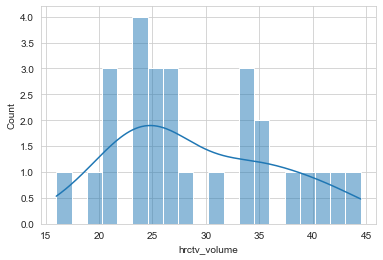

In [10]:
sns.histplot(hrctv_2B_volume['hrctv_volume'],bins=20,kde=True)

In [11]:
print("95% confidence interval for the population mean value")
data = hrctv_2B_volume['hrctv_volume']
stats.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=stats.sem(data))

95% confidence interval for the population mean value


(26.176909270052015, 32.1490166558739)

## Descriptive statistics of hrctv_volume of patients with 3B tumour stage

In [12]:
print("Descriptive statistics of hrctv_volume values of patients at 3B stage")
hrctv_3B_volume.describe()

Descriptive statistics of hrctv_volume values of patients at 3B stage


,id,hrctv_volume
count,16.000000,16.000000
mean,141.687500,28.237500
std,20.777291,12.497886
min,109.000000,10.500000
25%,127.750000,21.050000
50%,137.500000,28.050000
75%,158.250000,31.875000
max,179.000000,65.900000


<AxesSubplot:xlabel='hrctv_volume', ylabel='Count'>

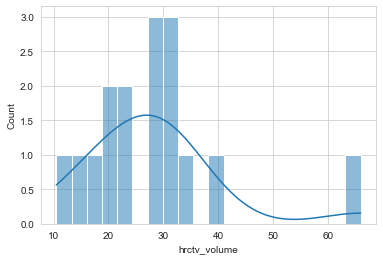

In [13]:
sns.histplot(hrctv_3B_volume['hrctv_volume'],bins=20,kde=True)

In [14]:
print("95% confidence interval for the population mean value")
data = hrctv_3B_volume['hrctv_volume']
stats.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=stats.sem(data))

95% confidence interval for the population mean value


(21.57784638118078, 34.89715361881923)

<AxesSubplot:xlabel='hrctv_volume', ylabel='Count'>

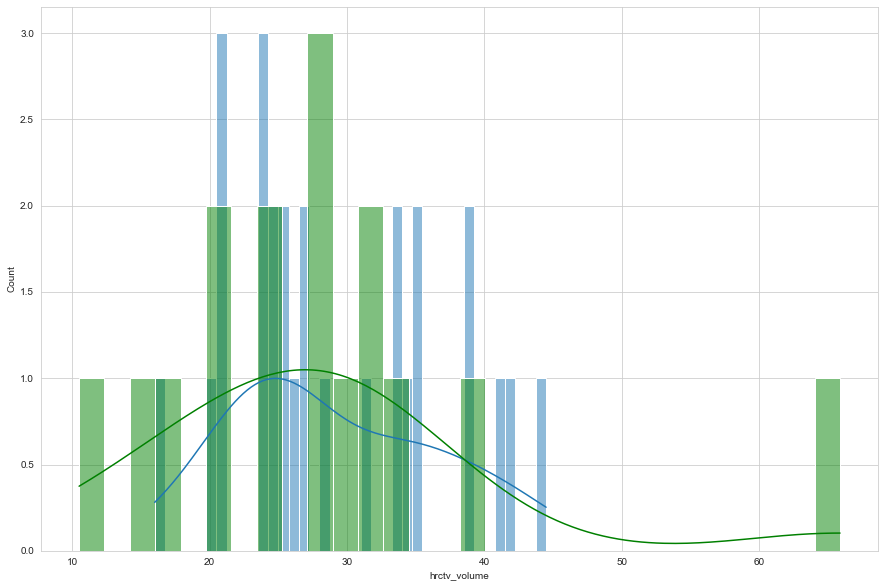

In [15]:
plt.figure(figsize=(15,10))
sns.histplot(hrctv_2B_volume['hrctv_volume'],bins=38,kde=True)
sns.histplot(hrctv_3B_volume['hrctv_volume'],color='green',bins=30,kde=True)


---
## Comparative analysis of hrctv_volume values for 2B and 3B tumour stages.

In [16]:
# Two sample T-test for population mean equality
alpha = 0.05
statistic,p_value = stats.ttest_ind(hrctv_3B_volume['hrctv_volume'], hrctv_2B_volume['hrctv_volume'], equal_var=True)
print ("Testing values of hrctv_2B_volume and hrctv_3B_volume if the two population means are equal."+"\nThe test statistic is: {}. The p_value is: {}.".format(statistic,p_value))
print("H0 = The two population means are equal."+"\nHA = The two population means are not equal."+"\nThe alpha is: 0.05")
if p_value < alpha:
    print("The null hypothesis can be rejected because the p value is less than alpha.")
else:
    print("The null hypothesis cannot be rejected because the p value is more than alpha.")

Testing values of hrctv_2B_volume and hrctv_3B_volume if the two population means are equal.
The test statistic is: -0.30372247895864574. The p_value is: 0.7628753671443148.
H0 = The two population means are equal.
HA = The two population means are not equal.
The alpha is: 0.05
The null hypothesis cannot be rejected because the p value is more than alpha.


In [17]:
#Testing for normality
alpha = 0.05
statistic,p_value = shapiro(hrctv_3B_volume['hrctv_volume'])
print ("Testing values of hrctv_3B_volume for normality using the Shapiro-Wilk test."+"\nThe test statistic is: {}. The p_value is: {}.".format(statistic,p_value))
print("H0 = The sample comes from a normal distribution."+"\nHA = The sample is not coming from normal distribution."+"\nThe alpha is: 0.05")
if p_value < alpha:
    print("The null hypothesis can be rejected because the p value is less than alpha.")
else:
    print("The null hypothesis cannot be rejected because the p value is more than alpha.")

Testing values of hrctv_3B_volume for normality using the Shapiro-Wilk test.
The test statistic is: 0.8539825677871704. The p_value is: 0.015600845217704773.
H0 = The sample comes from a normal distribution.
HA = The sample is not coming from normal distribution.
The alpha is: 0.05
The null hypothesis can be rejected because the p value is less than alpha.


In [18]:
#Testing for normality
alpha = 0.05
statistic,p_value = shapiro(hrctv_2B_volume['hrctv_volume'])
print ("Testing values of hrctv_3B_volume for normality using the Shapiro-Wilk test."+"\nThe test statistic is: {}. The p_value is: {}.".format(statistic,p_value))
print("H0 = The sample comes from a normal distribution."+"\nHA = The sample is not coming from normal distribution."+"\nThe alpha is: 0.05")
if p_value < alpha:
    print("The null hypothesis can be rejected because the p value is less than alpha.")
else:
    print("The null hypothesis cannot be rejected because the p value is more than alpha.")

Testing values of hrctv_3B_volume for normality using the Shapiro-Wilk test.
The test statistic is: 0.9518346190452576. The p_value is: 0.23746147751808167.
H0 = The sample comes from a normal distribution.
HA = The sample is not coming from normal distribution.
The alpha is: 0.05
The null hypothesis cannot be rejected because the p value is more than alpha.


---
The results of the paired t-test show that we have sufficient evidence to say that the mean values of two groups are different. '
Now, we perform one-tailed version of the paired t-test to test whether values of hrctv_3B_volume are less than the values of hrctv_2B_volume.

In [19]:
alpha = 0.05
statistic,p_value = stats.ttest_ind(hrctv_3B_volume['hrctv_volume'], hrctv_2B_volume['hrctv_volume'], alternative='less' )
print ("Testing values of hrctv_3B_volume and hrctv_-B_volume if the two population means are equal."+"\nThe test statistic is: {}. The p_value is: {}.".format(statistic,p_value))
print("H0 = The two population means are equal."+"\nHA = The population mean of hrctv_3B_volume is less than hrctv_2B_volume."+"\nThe alpha is: 0.05")
if p_value < alpha:
    print("The null hypothesis can be rejected because the p value is less than alpha.")
else:
    print("The null hypothesis cannot be rejected because the p value is more than alpha.")

Testing values of hrctv_3B_volume and hrctv_-B_volume if the two population means are equal.
The test statistic is: -0.30372247895864574. The p_value is: 0.3814376835721574.
H0 = The two population means are equal.
HA = The population mean of hrctv_3B_volume is less than hrctv_2B_volume.
The alpha is: 0.05
The null hypothesis cannot be rejected because the p value is more than alpha.


---
Finding 95 percent confidence interval for the difference of means of hrctv_2B_volume and hrctv_3B_volume

In [20]:
cm = sms.CompareMeans(sms.DescrStatsW(hrctv_3B_volume['hrctv_volume']), sms.DescrStatsW(hrctv_2B_volume['hrctv_volume']))
print (cm.tconfint_diff(usevar='pooled'))

(-7.079141053438275, 5.228215127512354)


In [21]:
mean_diff = hrctv_3B_volume['hrctv_volume'].mean() - hrctv_2B_volume['hrctv_volume'].mean()
print(mean_diff)

-0.9254629629629534


In [22]:
cm.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.9255,3.047,-0.304,0.763,-7.079,5.228


---
### Testing for normality
Many statistical tests works on the assumptions that the data is normally distributed. Therefore, it is important to determine the normality of distributions of all variables.
### Graphical methods
#### Histograms
The distribution of the variables can be understood visually by assessing histogram plots. The histogram of hrctv_volume values of patients at 2B stage indicate that it is a symmetrical distribution. However, it does not have visually clear peeking around the median value. The plot looks flatter than the normal distribution.

On the other hand, the histogram of patients at 3B stage shows that the distribution is right-skewed.


The histogram of hrctv_volume values of patients at 2B stage


<AxesSubplot:ylabel='Frequency'>

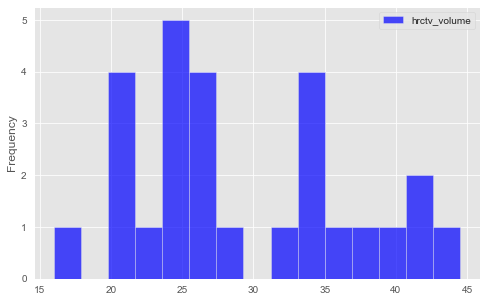

In [23]:
print("The histogram of hrctv_volume values of patients at 2B stage")
plt.style.use('ggplot')
hrctv_2B_volume['hrctv_volume'].plot.hist(color='blue',figsize=(8,5),bins=15, alpha=0.7, legend=True)

The histogram of hrctv_volume values of patients at 3B stage


<AxesSubplot:ylabel='Frequency'>

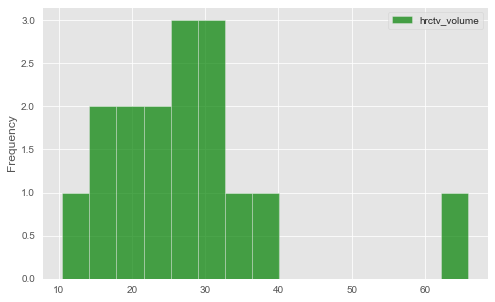

In [24]:
print("The histogram of hrctv_volume values of patients at 3B stage")
plt.style.use('ggplot')
hrctv_3B_volume['hrctv_volume'].plot.hist(color='green',figsize=(8,5),bins=15, alpha=0.7, legend=True)

#### Q-Q plots
A Q-Q plot is a scatter plot with two sets of quantiles against each other. If both sets of quantiles are coming from the same distribution, the points will make a line that’s roughly straight. The two graphs below compare quantiles of hrctv_volume against the theoretical quantile from the normal distribution.

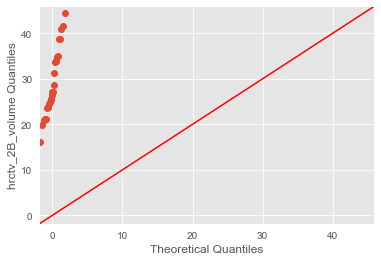

In [25]:
#Create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(hrctv_2B_volume['hrctv_volume'], line='45')

plt.xlabel('Theoretical Quantiles')
plt.ylabel('hrctv_2B_volume Quantiles')
plt.show()

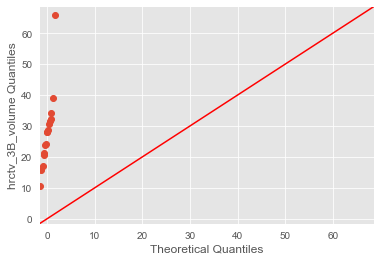

In [26]:
#Create Q-Q plot with 45-degree line added to plot
sm.qqplot(hrctv_3B_volume['hrctv_volume'], line='45')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('hrctv_3B_volume Quantiles')
plt.show()

Let's compare the QQ-plots above for hrctv_volume variables with the QQ-plot below of an array of similar size containing integers randomly drawn from a standard normal distribution. It can be clearly noticed that the distributions of hrctv_volume variables are not normal.

In [27]:
normDist = np.random.randn(35)

C:\Users\gdbt0\anaconda3\envs\cancer\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


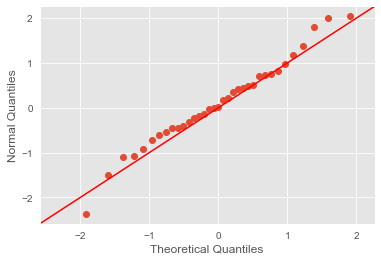

In [28]:
sm.qqplot(normDist, line='45', color='yellow')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Normal Quantiles')
plt.show()

#### Boxplots

A boxplot is a graphical depiction of numerical data through their quartiles. It is used to detect outliers and understand the distribution of the data. Boxplots show that hrctv_2B_volume is right-skewed whereas hrctv_3B_volume is approximately symmetrical with a couple of high outliers.

<AxesSubplot:title={'center':'hrctv_2B_volume'}>

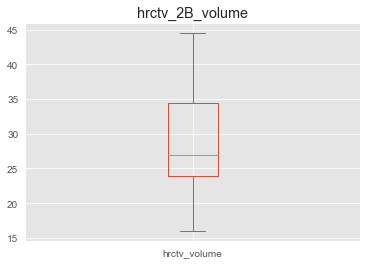

In [29]:
hrctv_2B_volume['hrctv_volume'].plot.box(title="hrctv_2B_volume")

<AxesSubplot:title={'center':'hrctv_3B_volume'}>

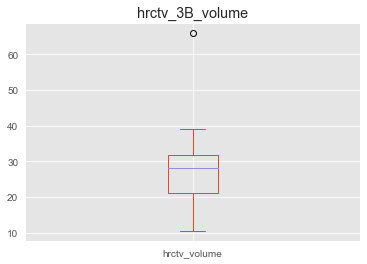

In [30]:
hrctv_3B_volume['hrctv_volume'].plot.box(title="hrctv_3B_volume")

### Statistical tests
Graphical illustrations of distributions provide with a quick overview on their shapes. Now, let's test for normality using statistical tests.

#### D’Agostino’s K-squared test
This tests whether a sample differs from a normal distribution.

H0 = The sample comes from a normal distribution.



It is based on D’Agostino and Pearson’s [1], [2] test that combines skew and kurtosis to produce an omnibus test of normality. In Python, [scipy.stats.normaltest](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html) is used to test this. It gives the statistic which is s^2 + k^2, where s is the z-score returned by skew test and k is the z-score returned by kurtosis test and p-value, i.e., 2-sided chi squared probability for the hypothesis test. After using alpha value of 0.05, below results were found.

In [31]:
# D’Agostino’s K-squared test on hrctv_2B_volume
alpha = 0.05
statistic,p_value = stats.normaltest(hrctv_2B_volume['hrctv_volume'])
print ("Testing values of hrctv_2B_volume for normality using the D’Agostino’s K-squared test."+"\nThe test statistics is: {}. The p_value is: {}.".format(statistic,p_value))
print("H0 = The sample comes from a normal distribution."+"\nHA = The sample is not coming from normal distribution."+"\nThe alpha is: 0.05")
if p_value < alpha:
    print("The null hypothesis can be rejected because the p value is less than alpha.")
else:
    print("The null hypothesis cannot be rejected because the p value is more than alpha.")

Testing values of hrctv_2B_volume for normality using the D’Agostino’s K-squared test.
The test statistics is: 1.9703555179696495. The p_value is: 0.37337285065845166.
H0 = The sample comes from a normal distribution.
HA = The sample is not coming from normal distribution.
The alpha is: 0.05
The null hypothesis cannot be rejected because the p value is more than alpha.


In [32]:
# D’Agostino’s K-squared test on hrctv_3B_volume
alpha = 0.05
statistic,p_value = stats.normaltest(hrctv_3B_volume['hrctv_volume'])
print ("Testing values of hrctv_3B_volume for normality using the D’Agostino’s K-squared test."+"\nThe test statistics is: {}. The p_value is: {}.".format(statistic,p_value))
print("H0 = The sample comes from a normal distribution."+"\nHA = The sample is not coming from normal distribution."+"\nThe alpha is: 0.05")
if p_value < alpha:
    print("The null hypothesis can be rejected because the p value is less than alpha.")
else:
    print("The null hypothesis cannot be rejected because the p value is more than alpha.")

Testing values of hrctv_3B_volume for normality using the D’Agostino’s K-squared test.
The test statistics is: 15.756240866539514. The p_value is: 0.00037894463957661675.
H0 = The sample comes from a normal distribution.
HA = The sample is not coming from normal distribution.
The alpha is: 0.05
The null hypothesis can be rejected because the p value is less than alpha.


C:\Users\gdbt0\anaconda3\envs\cancer\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


D’Agostino’s K-squared test failed to reject the null hypothesis that the sample comes from a population with normal distribution for the hrctv_2B_volume.

However, the test rejected the null hypothesis for hrctv_3B_volume. From the graphical representations above we can see that there are only two outliers above the value of 50. Let's introduce an assumption that extreme outliers can be ignored during the research. With this assumption, let's remove the two outliers from the sample and run the normality test again.

In [33]:
hrctv_3B_volume = hrctv_3B_volume[hrctv_3B_volume['hrctv_volume']<50]
hrctv_3B_volume.describe()


,id,hrctv_volume
count,15.000000,15.000000
mean,140.066667,25.726667
std,20.432700,7.699394
min,109.000000,10.500000
25%,126.500000,20.900000
50%,137.000000,27.900000
75%,154.000000,31.200000
max,179.000000,39.000000


The histogram of hrctv_volume values of patients at 3B stage


<AxesSubplot:ylabel='Frequency'>

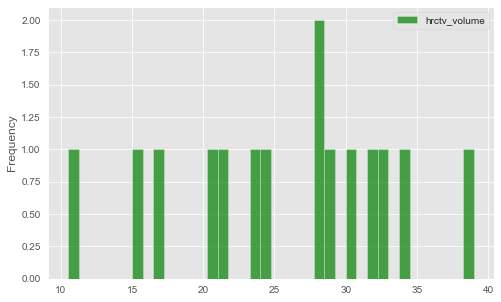

In [34]:
print("The histogram of hrctv_volume values of patients at 3B stage")
hrctv_3B_volume['hrctv_volume'].plot.hist(color='green',figsize=(8,5),bins=38, alpha=0.7, legend=True)

In [35]:
# D’Agostino’s K-squared test on hrctv_3B_volume
alpha = 0.05
statistic,p_value = stats.normaltest(hrctv_3B_volume['hrctv_volume'])
print ("Testing values of hrctv_3B_volume for normality using the D’Agostino’s K-squared test."+"\nThe test statistics is: {}. The p_value is: {}.".format(statistic,p_value))
print("H0 = The sample comes from a normal distribution."+"\nHA = The sample is not coming from normal distribution."+"\nThe alpha is: 0.05")
if p_value < alpha:
    print("The null hypothesis can be rejected because the p value is less than alpha.")
else:
    print("The null hypothesis cannot be rejected because the p value is more than alpha.")

Testing values of hrctv_3B_volume for normality using the D’Agostino’s K-squared test.
The test statistics is: 0.3444922344654414. The p_value is: 0.841771973083193.
H0 = The sample comes from a normal distribution.
HA = The sample is not coming from normal distribution.
The alpha is: 0.05
The null hypothesis cannot be rejected because the p value is more than alpha.


C:\Users\gdbt0\anaconda3\envs\cancer\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Now we can see that the D’Agostino’s K-squared test failed to reject the null hypothesis.

#### Kolmogorov-Smirnov test

 This is a non-parametric test i.e., it has no assumption about the distribution of the data. Kolmogorov-Smirnov test is used to understand how well the distribution of sample data conforms to some theoretical distribution. In this, we compare between some theoretical cumulative distribution function, (Ft(x)), and a samples’ cumulative distribution function , (Fs(x)) where the sample is a random sample with unknown cumulative distribution function Fs(x). Precisely,

H0: Fs(x) is equal to Ft(x) for all x from -inf. to inf.

HA: Fs(x) is not equal to Ft(x) for at least one x

In the kstest function, the parameter “alternative” is used for the alternative hypothesis with default value of “two-sided” and for “args”, ‘norm’ option is given to compare. Again, we can conclude, all the variables are not normally distributed as p-value is 0 in all variables.

The datasets have to be standardized in order to be compared with the standard normal distribution.

In [36]:
# Standardisation to mean=0 and std=1.
sample = hrctv_2B_volume['hrctv_volume']
hrctv_2B_volume_stan = (sample - sample.mean())/sample.std()
sample = hrctv_3B_volume['hrctv_volume']
hrctv_3B_volume_stan = (sample - sample.mean())/sample.std()

In [37]:
# Kolmogorov-Smirnov test on hrctv_2B_volume

statistic,p_value = stats.kstest(hrctv_2B_volume_stan, 'norm')
print ("Testing values of hrctv_2B_volume for normality using the K-S test."+"\nThe test statistic is: {}. The p_value is: {}.".format(statistic,p_value))
print("H0 = The sample comes from a normal distribution."+"\nHA = The sample is not coming from normal distribution."+"\nThe alpha is: 0.05")
if p_value < alpha:
    print("The null hypothesis can be rejected because the p value is less than alpha.")
else:
    print("The null hypothesis cannot be rejected because the p value is more than alpha.")

Testing values of hrctv_2B_volume for normality using the K-S test.
The test statistic is: 0.15814282662301504. The p_value is: 0.4624214708715565.
H0 = The sample comes from a normal distribution.
HA = The sample is not coming from normal distribution.
The alpha is: 0.05
The null hypothesis cannot be rejected because the p value is more than alpha.


In [38]:
# Kolmogorov-Smirnov test on hrctv_3B_volume

statistic,p_value = stats.kstest(hrctv_3B_volume_stan, 'norm')
print ("Testing values of hrctv_3B_volume for normality using the K-S test."+"\nThe test statistic is: {}. The p_value is: {}.".format(statistic,p_value))
print("H0 = The sample comes from a normal distribution."+"\nHA = The sample is not coming from normal distribution."+"\nThe alpha is: 0.05")
if p_value < alpha:
    print("The null hypothesis can be rejected because the p value is less than alpha.")
else:
    print("The null hypothesis cannot be rejected because the p value is more than alpha.")

Testing values of hrctv_3B_volume for normality using the K-S test.
The test statistic is: 0.14446635507881977. The p_value is: 0.8699651255569589.
H0 = The sample comes from a normal distribution.
HA = The sample is not coming from normal distribution.
The alpha is: 0.05
The null hypothesis cannot be rejected because the p value is more than alpha.


In the case of K-S test, it reports that there are sufficient evidences to say that both sample come from the normal distribution.

In summary, we have sufficient evidences from multiple tests to say that both samples, hrctv_3B_volume and hrctv_3B_volume come from the normal distribution.


## Two-sample tests

#### Two sample Kolmogorov-Smirnov test
This test is used to determine whether two samples came from the same distribution. Let's test our two samples if they came from the same distribution.

In [39]:
statistic,p_value = stats.ks_2samp(hrctv_3B_volume['hrctv_volume'], hrctv_2B_volume['hrctv_volume'])
print ("Testing values of hrctv_2B_volume and hrctv_3B_volume if they cam from the same distribution using the K-S test."+"\nThe test statistic is: {}. The p_value is: {}.".format(statistic,p_value))
print("H0 = The two samples come from the same distribution."+"\nHA = The two samples did not come from the same distribution."+"\nThe alpha is: 0.05")
if p_value < alpha:
    print("The null hypothesis can be rejected because the p value is less than alpha.")
else:
    print("The null hypothesis cannot be rejected because the p value is more than alpha.")

Testing values of hrctv_2B_volume and hrctv_3B_volume if they cam from the same distribution using the K-S test.
The test statistic is: 0.23703703703703705. The p_value is: 0.5612508563741871.
H0 = The two samples come from the same distribution.
HA = The two samples did not come from the same distribution.
The alpha is: 0.05
The null hypothesis cannot be rejected because the p value is more than alpha.


The result of the two-sample Kolmogorov-Smirnov test indicates that we have sufficient evidence to say that the two sample datasets come from the same distribution. Which is true, since two samples are drawn from the Brachytherapy.hrctv_volume dataset.

#### T-test

T-test is a popular statistical test that is used to compare the means of two groups.  It is often used in hypothesis testing to determine whether a process or treatment actually has an effect on the population of interest. In our case, we use a two-sample t-test because we want to test the difference between two samples from a single population.

First, let's perform a two tailed t-test to check whether the two samples are different from one another.

For the results of a two sample t-test to be valid, the following assumptions should be met:

1. The observations in one sample should be independent of the observations in the other sample.
2. The data should be approximately normally distributed.
3. The two samples should have approximately the same variance. If this assumption is not met, you should instead perform Welch’s t-test.
4. The data in both samples was obtained using a random sampling method.

Assumption 1. Independence

The assumption is met because in our case, a patient belongs to only one sample.

Assumption 2. Normality

The assumption is met and sufficiently checked previously.

Assumption 3. Homogeneity of variances

We can use the following rule of thumb to determine if the variances between the two samples are equal: If the ratio of the larger variance to the smaller variance is less than 4, then we can assume the variances are approximately equal and use the two sample t-test.

In [40]:
#Checking for homogeneity of variances
ratio = hrctv_2B_volume['hrctv_volume'].var() / hrctv_3B_volume['hrctv_volume'].var()
print("The ratio between two variances of sample groups are: {}".format(ratio))

The ratio between two variances of sample groups are: 0.9611662402341771


The ratio between two variances is 1.29 < 4. Therefore, the assumption is met.

Assumption 4

A two sample t-test makes the assumption that both samples were obtained using a random sampling method. It is automatically assumed.

Now, let's perform the test  since all assumptions are met.

In [41]:
alpha = 0.05
statistic,p_value = stats.ttest_ind(hrctv_3B_volume['hrctv_volume'], hrctv_2B_volume['hrctv_volume'], equal_var=True)
print ("Testing values of hrctv_2B_volume and hrctv_3B_volume if the two population means are equal."+"\nThe test statistic is: {}. The p_value is: {}.".format(statistic,p_value))
print("H0 = The two population means are equal."+"\nHA = The two population means are not equal."+"\nThe alpha is: 0.05")
if p_value < alpha:
    print("The null hypothesis can be rejected because the p value is less than alpha.")
else:
    print("The null hypothesis cannot be rejected because the p value is more than alpha.")

Testing values of hrctv_2B_volume and hrctv_3B_volume if the two population means are equal.
The test statistic is: -1.4037459436220348. The p_value is: 0.1681109348756226.
H0 = The two population means are equal.
HA = The two population means are not equal.
The alpha is: 0.05
The null hypothesis cannot be rejected because the p value is more than alpha.


The results of the two-tailed two sample t-test show that we do not have sufficient evidence to say that the mean values of hrctv_volume for patients of 2B and 3B stages are different.